 # Chapitre 1: Introduction à l'apprentissage automatique 

# Regression linéaire

# Chargement et traçage des données

Pour la première partie, nous ferons une régression linéaire avec une variable, et nous n'utiliserons donc que deux champs de l'ensemble de données quotidiennes: la température élevée normalisée en C et le nombre total de locations de vélos. Les valeurs des locations sont mises à l'échelle d'un facteur mille, compte tenu de la différence de grandeur entre elles et les températures normalisées.

In [132]:
import pandas as pd

data = pd.read_csv("data.csv")
temps = data['atemp'].values
rentals = data['cnt'].values / 1000
pd.DataFrame(data)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


La figure révèle un certain degré de corrélation entre la température et la location de vélos, comme on pourrait le deviner.

Text(0, 0.5, 'Bike Rentals in 1000s')

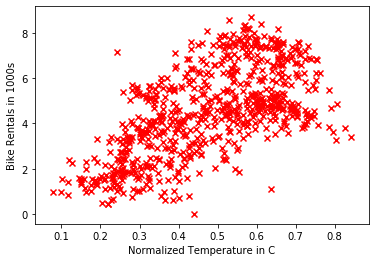

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')

# Linéaire regression simple

Nous commencerons par implémenter la 
[fonction de coût](https://en.wikipedia.org/wiki/Loss_function) 
pour la régression linéaire, spécifiquement l'erreur quadratique moyenne ([MSE](https://en.wikipedia.org/wiki/Mean_squared_error)):

\begin{align}
MSE ={\frac {1}{n}}\sum _{i=1}^{2n}(Y_{i}-{\hat {Y_{i}}})^{2}.
\end{align}

Intuitivement, MSE représente une agrégation des distances entre la valeur y réelle du point et quelle fonction d'hypothèse  $h_\theta(x)$
  prédit que ce serait. Cette fonction d'hypothèse et la fonction de coût $J(\theta)$ sont définies comme
  

\begin{align}
h_\theta(x) & = \theta_0 + \theta_1x_1 \\
J(\theta) & = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{align}

où  $\theta$ est un vecteur de poids d'entités, $x^{(i)}$  est le ième exemple d'apprentissage, $y^{(i)} $ est la valeur y de cet exemple et $x_j$  est la valeur de sa $j {ième}$ fonctionnalité.
 

In [135]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

Avant de calculer le coût avec une estimation initiale de $\theta$, une colonne de 1 est ajoutée aux données d'entrée. Cela nous permet de vectoriser la fonction de coût, ainsi que de la rendre utilisable pour une régression linéaire multiple plus tard. Cette première valeur $\theta_0$ se comporte désormais comme une constante dans la fonction de coût.

In [136]:
theta = np.zeros(2)
X = np.column_stack((np.ones(len(temps)), temps))
y = rentals
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0. 0.]
cost: 12.018406441176468


Nous allons maintenant minimiser le coût en utilisant l'algorithme [descente de gradient](https://en.wikipedia.org/wiki/Gradient_descent). Intuitivement, la descente en gradient prend de petits sauts linéaires sur la pente d'une fonction dans chaque dimension d'entité, la taille de chaque saut étant déterminée par la dérivée partielle de la fonction de coût par rapport à cette entité et un multiplicateur de taux d'apprentissage $\alpha$. S'il est réglé correctement, l'algorithme converge sur un minimum global en ajustant de manière itérative les poids de fonctionnalité $\theta$ de la fonction de coût, comme illustré ici pour deux dimensions de fonctionnalité:

\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{\partial}{\partial\theta_0} J(\theta_0,\theta_1) \\
\theta_1 & := \theta_1 - \alpha\frac{\partial}{\partial\theta_1} J(\theta_0,\theta_1) 
\end{align}

La règle de mis-à-jours dans chaque iteration devient:

\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \\
\theta_1 & := \theta_1 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_1^{(i)} \\
\end{align}

 

In [138]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

iterations = 5000
alpha = 0.1

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta) 
print('cost:', compute_cost(X, y, theta))
 

theta: [0.94588081 7.50171673]
cost: 1.1275869258439812


Nous pouvons examiner les valeurs de $\theta$ choisies par l'algorithme en utilisant quelques visualisations différentes, d'abord en traçant $h_\theta(x)$ par rapport aux données d'entrée.  

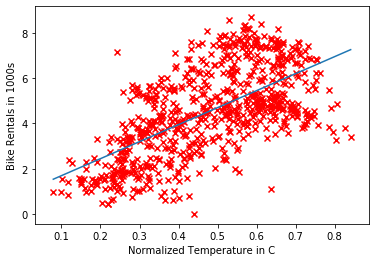

In [139]:
plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')
samples = np.linspace(min(temps), max(temps))
plt.plot(samples, theta[0] + theta[1] * samples)

Les résultats montrent la corrélation attendue entre la température et les locations de vélos.

Un tracé de surface est une meilleure illustration de la façon dont la descente du gradient s'approche d'un minimum global, en traçant les valeurs de $\theta$ par rapport à leur coût associé. Cela nécessite un peu plus de code qu'une implémentation dans Octave/MATLAB, principalement en raison de la façon dont les données d'entrée sont générées et envoyées à la fonction de tracé de surface.

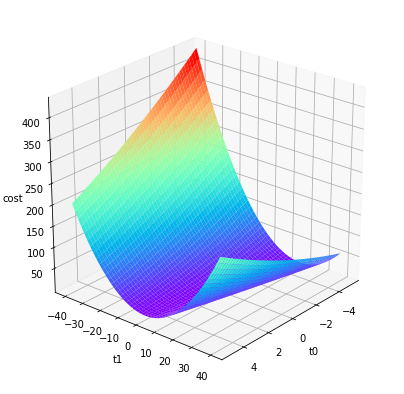

In [140]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Xs, Ys = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-40, 40, 50))
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

Enfin, un tracé de contour révèle des tranches de ce tracé de surface dans un espace 2D et peut afficher les valeurs $\theta$ résultantes exactement au minimum global.

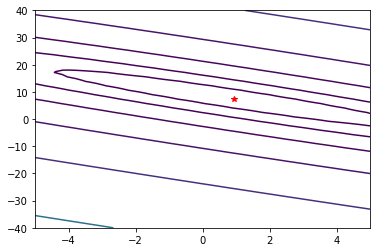

In [141]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))

intercept:  [0.94582398]
coef:  [[7.50183395]]
Score by LR:  0.3982439175261368
R2 score:  0.39824391752613686
theta: [0.94582398 7.50183395]
cost: 1.1275869256610176
MSE:  1.501723626810884


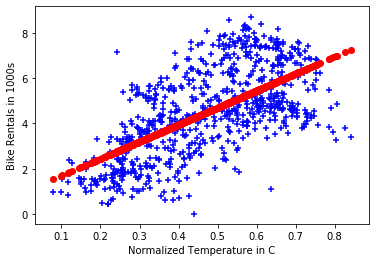

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LinearRegression 
 
data = pd.read_csv("data.csv")
temps = data['atemp'].values
rentals = data['cnt'].values / 1000

x=temps.reshape(temps.shape[0],1)  
y=rentals.reshape(rentals.shape[0],1)  

lr = LinearRegression().fit(x, y) 
y_pred = lr.predict(x)
    
plt.scatter(x, y, marker='+', color='b')
plt.scatter(x, y_pred, marker='o', color='r')
 
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s') 

print ("intercept: " ,lr.intercept_)
print ("coef: ", lr.coef_)
print ("Score by LR: ", lr.score(x, y))
print ("R2 score: ", metrics.r2_score(y, y_pred))

theta  =np.hstack( (lr.intercept_ , lr.coef_[0]))   
X = np.column_stack((np.ones(len(temps)), temps))
 
print("theta:", theta)
print('cost:', compute_cost(X, rentals , theta))  
print("MSE: ", np.sqrt(metrics.mean_squared_error(y, y_pred)))

 
 

# Régression linéaire multiple

Une régression linéaire simple peut facilement être étendue pour inclure plusieurs fonctionnalités. C'est ce qu'on appelle la régression linéaire multiple:
$y = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$
 
Chaque $x_i$ représente une entité différente, et chaque entité a son propre coefficient. Dans ce cas:
$y = \theta_0 + \theta_1 × atemp + \theta_2 × atemp + \theta_3 × atemp $

Nous devons estimons ces coefficients.


Tout d'abord, nous rechargeons les données et ajoutons deux autres fonctionnalités, l'humidité et la vitesse du vent.

Avant d'implémenter la descente de gradient pour plusieurs variables, nous appliquerons également la mise à l'échelle ([feature scaling](https://en.wikipedia.org/wiki/Feature_scaling)) pour normaliser les valeurs des fonctionnalités, en empêchant l'une d'entre elles d'influencer de manière disproportionnée les résultats. comme aidant la descente du gradient à converger plus rapidement. Dans ce cas, chaque valeur de caractéristique est ajustée en soustrayant la moyenne et en divisant le résultat par l'écart-type de toutes les valeurs de cette caractéristique:


$$
z = \frac{x - \mu}{\sigma}
$$

Plus de détails sur la mise à l'échelle et la normalisation des fonctionnalités peuvent être trouvés [ici](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html).
 
 

In [176]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs
    
    return normalized

X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))

y = data['cnt'].values / 1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


L'étape suivante consiste à implémenter la descente de gradient pour un nombre quelconque d'entités. Heureusement, l'étape de mise à jour se généralise facilement et peut être vectorisée pour éviter d'itérer à travers les valeurs $\theta_j$ comme pourrait le suggérer l'implémentation d'une seule variable ci-dessus:
 
$$
\theta_j := \theta_j - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In [177]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient

    return theta

theta = gradient_descent_multi(X, y, theta, alpha, iterations)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost', cost)

theta: [ 4.50434884  1.22203893 -0.45083331 -0.34166068]
cost 1.0058709247119848


Malheureusement, il est désormais plus difficile d'évaluer visuellement les résultats, mais nous pouvons les vérifier selon une méthode totalement différente de calcul de la réponse,  l'équation normale ( [normal equation](http://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/)). Cela résout directement la solution sans itération spécifiant une valeur $\alpha$, bien qu'elle commence à être pire que la descente de gradient avec un grand nombre plus de (10 000) de fonctionnalités (features).
 

$$
\theta = (X^TX)^{-1}X^Ty
$$

In [169]:
from numpy.linalg import inv

def normal_eq(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_eq(X, y)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [ 4.50434884  1.22203893 -0.45083331 -0.34166068]
cost: 1.0058709247119846


Les valeurs de $\theta$ et les coûts  pour chaque implémentation sont identiques, nous pouvons donc avoir un haut degré de confiance quant à leur exactitude.

 
 

# '###########SKLEARN##########################'

Nous allons maintenant utiliser la bibliothèque sklearn

In [179]:
 
X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
x = feature_normalize(X)

y=rentals.reshape(rentals.shape[0],1)  

lr = LinearRegression().fit(x, y) 
y_pred = lr.predict(x)
     
print ("intercept: " ,lr.intercept_)
print ("coef: ", lr.coef_)
print ("Score by LR: ", lr.score(x, y))
print ("R2 score: ", metrics.r2_score(y, y_pred))

theta  =np.hstack( (lr.intercept_ , lr.coef_[0]))   
X = np.column_stack((np.ones(len(temps)), temps))
y = data['cnt'].values / 1000

print("theta:", theta)
X = np.column_stack((np.ones(len(x)), x))


print('cost:', compute_cost(X, y , theta))  
 
 

intercept:  [4.50434884]
coef:  [[ 1.22203893 -0.45083331 -0.34166068]]
Score by LR:  0.463199746862787
R2 score:  0.463199746862787
theta: [ 4.50434884  1.22203893 -0.45083331 -0.34166068]
cost: 1.0058709247119846


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
